### data6数据

In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [38]:
dataset = pd.read_csv('data/data6.csv',engine='python')

In [39]:
dataset

,GM风机I回,data
0,67085640,NaN
1,67085860,220.0
2,67086000,140.0
3,67086072,72.0
4,67086288,216.0
...,...,...
145,67106884,80.0
146,67107092,208.0
147,67107240,148.0
148,67107312,72.0


In [40]:
dataset = dataset.fillna(0)
dataset

,GM风机I回,data
0,67085640,0.0
1,67085860,220.0
2,67086000,140.0
3,67086072,72.0
4,67086288,216.0
...,...,...
145,67106884,80.0
146,67107092,208.0
147,67107240,148.0
148,67107312,72.0


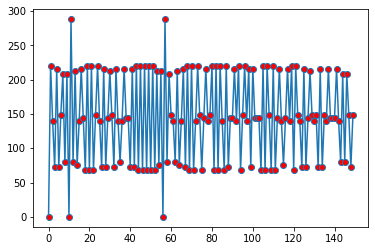

In [41]:
plt.plot(list(range(0,150)),dataset["data"],marker='o',markerfacecolor="r")

In [42]:
#set variable
rs = np.random.RandomState(169)
lendata = dataset.shape[0]
outliers_fraction = 0.02
test_data = []
anomaly = []

In [43]:
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a, b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

In [44]:
#read dataset x,y
x = normalize(pd.DataFrame(dataset, columns=["data"]),-1,1)

In [45]:
ifm = IsolationForest(n_estimators=100,verbose=2,n_jobs=2,max_samples=lendata,random_state=rs,max_features=1)

In [46]:
ifm.fit(x)

Building estimator 1 of 50 for this parallel run (total 100)...
Building estimator 1 of 50 for this parallel run (total 100)...
Building estimator 2 of 50 for this parallel run (total 100)...Building estimator 2 of 50 for this parallel run (total 100)...

Building estimator 3 of 50 for this parallel run (total 100)...Building estimator 3 of 50 for this parallel run (total 100)...

Building estimator 4 of 50 for this parallel run (total 100)...
Building estimator 4 of 50 for this parallel run (total 100)...
Building estimator 5 of 50 for this parallel run (total 100)...Building estimator 5 of 50 for this parallel run (total 100)...

Building estimator 6 of 50 for this parallel run (total 100)...Building estimator 6 of 50 for this parallel run (total 100)...

Building estimator 7 of 50 for this parallel run (total 100)...Building estimator 7 of 50 for this parallel run (total 100)...

Building estimator 8 of 50 for this parallel run (total 100)...Building estimator 8 of 50 for this paral

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s finished


IsolationForest(max_features=1, max_samples=150, n_jobs=2,
                random_state=RandomState(MT19937) at 0x7FE03DFF4040, verbose=2)

In [47]:
scores_pred = ifm.decision_function(x)

In [48]:
scores_pred

array([-0.26840029,  0.0285324 ,  0.01364628,  0.02576075,  0.03327316,
        0.02576075, -0.00259288, -0.08722587, -0.06219495, -0.08722587,
       -0.26840029, -0.28883211, -0.06219495, -0.04369336, -0.08084472,
        0.01364628,  0.03327316,  0.02359386,  0.02062558,  0.0285324 ,
        0.02062558,  0.0285324 ,  0.02062558, -0.00259288,  0.0285324 ,
        0.01364628,  0.02576075,  0.03327316,  0.02576075,  0.02359386,
       -0.04369336, -0.00259288,  0.02576075,  0.03327316,  0.01364628,
       -0.06219495,  0.01364628,  0.03327316,  0.02359386,  0.02359386,
        0.02576075,  0.03327316,  0.02576075,  0.0285324 ,  0.02062558,
        0.0285324 ,  0.02062558,  0.0285324 ,  0.02062558,  0.0285324 ,
        0.02062558,  0.0285324 ,  0.02062558, -0.04369336, -0.08084472,
       -0.04369336, -0.26840029, -0.28883211, -0.06219495, -0.08722587,
       -0.00259288,  0.01364628, -0.06219495, -0.04369336, -0.08084472,
        0.01364628,  0.03327316,  0.02576075,  0.0285324 ,  0.02

In [49]:
threshold = stats.scoreatpercentile(scores_pred, 100 * outliers_fraction)

In [50]:
threshold

-0.2684002894802058

In [51]:
dataset

,GM风机I回,data
0,67085640,0.0
1,67085860,220.0
2,67086000,140.0
3,67086072,72.0
4,67086288,216.0
...,...,...
145,67106884,80.0
146,67107092,208.0
147,67107240,148.0
148,67107312,72.0


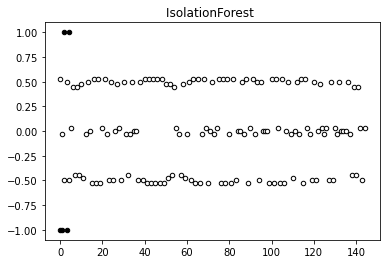

In [52]:
plt.title("IsolationForest ")
for i in scores_pred:
    if i <= threshold:
        #print(i)
        test_data.append(1)
        anomaly.append(i)
    else:
        test_data.append(0)
        
ano_lable = np.column_stack(((dataset['GM风机I回'],dataset['data'],x,scores_pred, test_data)))
df = pd.DataFrame(data=ano_lable, columns=['GM风机I回','data','x', 'IsoFst_Score','label'])

b = plt.scatter(list(range(0,145)),df['x'][df['label'] == 0], s=20, edgecolor='k',c='white')
c = plt.scatter(list(range(0,5)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [53]:
ano_lable = np.column_stack(((df['GM风机I回'],df['data'],x,scores_pred, test_data)))

In [54]:
df = pd.DataFrame(data=ano_lable, columns=['GM风机I回','data','x', 'IsoFst_Score','label'])

In [55]:
df

,GM风机I回,data,x,IsoFst_Score,label
0,67085640.0,0.0,-1.000000,-0.268400,1.0
1,67085860.0,220.0,0.527778,0.028532,0.0
2,67086000.0,140.0,-0.027778,0.013646,0.0
3,67086072.0,72.0,-0.500000,0.025761,0.0
4,67086288.0,216.0,0.500000,0.033273,0.0
...,...,...,...,...,...
145,67106884.0,80.0,-0.444444,-0.062195,0.0
146,67107092.0,208.0,0.444444,-0.087226,0.0
147,67107240.0,148.0,0.027778,-0.002593,0.0
148,67107312.0,72.0,-0.500000,0.025761,0.0


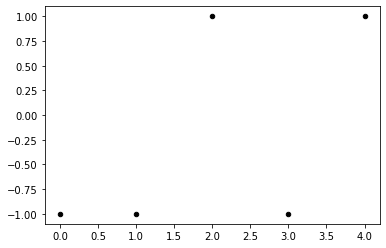

In [56]:
c = plt.scatter(list(range(0,5)),df['x'][df['label'] == 1], s=20, edgecolor='k',c='black')

In [57]:
print("孤立森林阈值  ：",threshold)
print("全量数据样本数：",len(dataset),"个")
print("检测异常样本数：",len(anomaly),"个")

孤立森林阈值  ： -0.2684002894802058
全量数据样本数： 150 个
检测异常样本数： 5 个
